In [2]:
import numpy as np
from SALib.sample import fast_sampler
from SALib.analyze import sobol
from SALib.analyze import fast
import matplotlib.pyplot as plt
from SALib import ProblemSpec
from SALib.sample import saltelli

##########################
#http0.1://salib.readthedocs.io/en/latest/basics_with_interface.html
##########################
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Pacejka52 as pa52
import Pacejka52_Sv_Sh_0 as pa52_0

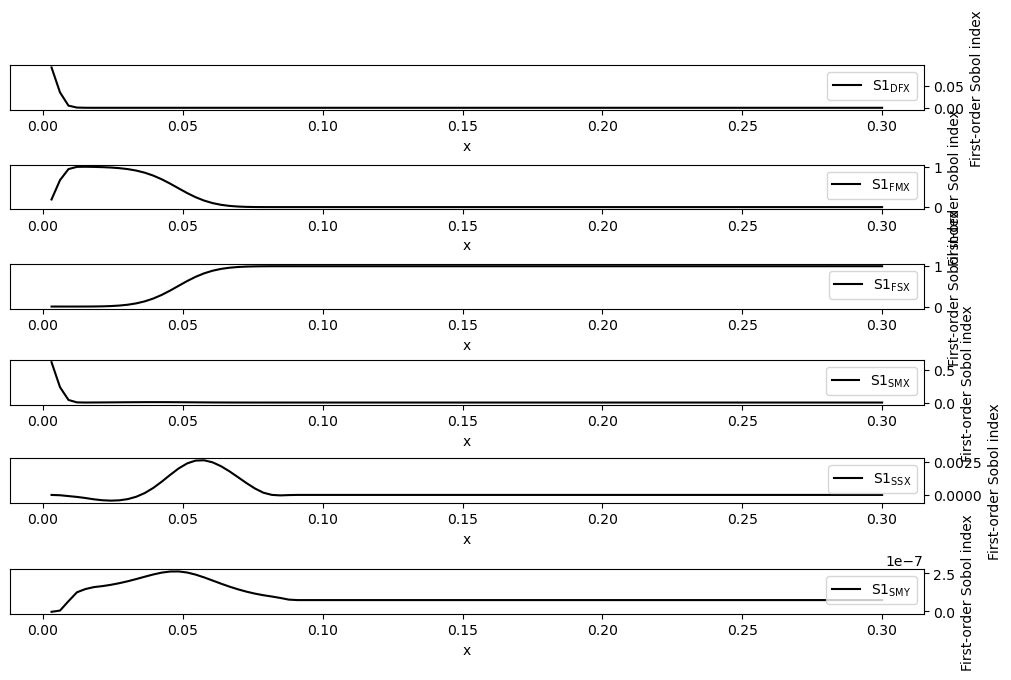

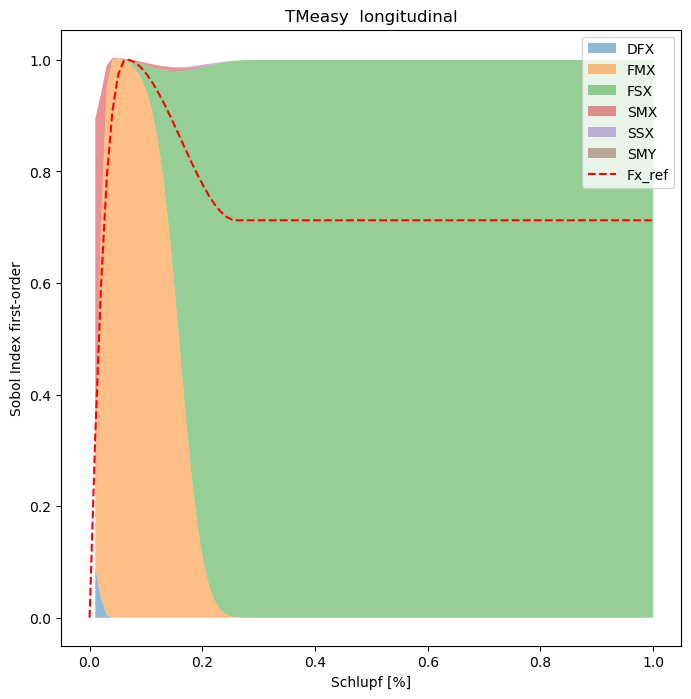

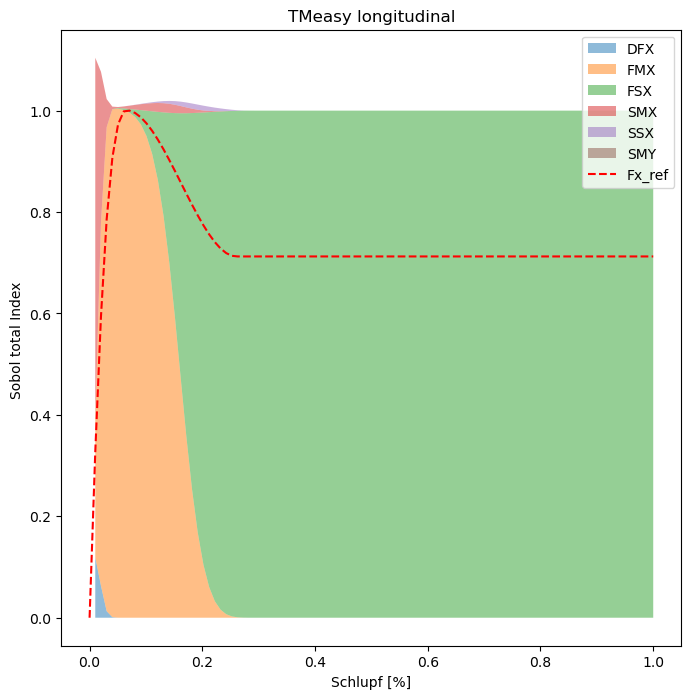

In [4]:
#TMeasy long

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import TMeasy as tm
#function
SX = np.linspace(0,1,100)
SY = np.linspace(0,0.3,100)
Fx_params_alt = [2.53974515e+05, 7.39199255e+03, 5.26261106e+03, 6.49997821e-02,
 2.59983609e-01, 1.13984715e+03]
F_ref = tm.calcFx(SX, SY,*Fx_params_alt)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))
for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max

s=0.1
sp = ProblemSpec({
    'num_vars': 6,
    'names': ['DFX', 'FMX', 'FSX', 'SMX','SSX', 'SMY'],
    'bounds': [[1e+05 ,5e+05], [ 3000, 7500], 
               [1900  , 6000], [0.001 , 0.06],
               [ 0.26, 0.3], [ 1, 1500]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SX=SX):
    y = np.zeros((ab.shape[0], SX.shape[0]))
    for i, (DFX, FMX, FSX, SMX,SSX, SMY) in enumerate(ab):
        y[i,:] = tm.calcFx( SX, SY, DFX, FMX, FSX, SMX,SSX, SMY)

    return y

(
sp.sample_sobol(2**10) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(6, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
ax4 = fig.add_subplot(gs[4, 0])
ax5 = fig.add_subplot(gs[5, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4, ax5]):
    ax.plot(SY, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
#DFX, FMX, FSX, SMX,SSX, SMY
S1s_DFX  = np.array(S1s[:,0])
S1s_FMX  = np.array(S1s[:,1])
S1s_FSX  = np.array(S1s[:,2])
S1s_SMX  = np.array(S1s[:,3])
S1s_SSX  = np.array(S1s[:,4])
S1s_SMY  = np.array(S1s[:,5])

S1s_FMX_plt = np.array([x+y for x,y in zip(S1s_DFX,S1s_FMX)])
S1s_FSX_plt = np.array([x+y for x,y in zip(S1s_FMX_plt,S1s_FSX)])
S1s_SMX_plt = np.array([x+y for x,y in zip(S1s_FSX_plt,S1s_SMX)])
S1s_SSX_plt = np.array([x+y for x,y in zip(S1s_SMX_plt,S1s_SSX)])
S1s_SMY_plt = np.array([x+y for x,y in zip(S1s_SSX_plt,S1s_SMY)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SX,S1s_DFX,0, alpha=0.5, label = 'DFX') #alpha = deckkraft farbe
plt.fill_between(SX,S1s_DFX,S1s_FMX_plt, where = (S1s_FMX_plt > S1s_DFX), alpha=0.5, label = 'FMX')
plt.fill_between(SX,S1s_FMX_plt,S1s_FSX_plt, where = (S1s_FSX_plt > S1s_FMX_plt), alpha=0.5, label = 'FSX')
plt.fill_between(SX,S1s_FSX_plt,S1s_SMX_plt, where = (S1s_SMX_plt > S1s_FSX_plt), alpha=0.5, label = 'SMX')
plt.fill_between(SX,S1s_SMX_plt,S1s_SSX_plt, where = (S1s_SSX_plt > S1s_SMX_plt), alpha=0.5, label = 'SSX')
plt.fill_between(SX,S1s_SSX_plt,S1s_SMY_plt, where = (S1s_SMY_plt > S1s_SSX_plt), alpha=0.5, label = 'SMY')
plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol Index first-order')
plt.plot(SX,F_ref_plt, 'r--', label = 'Fx_ref')
plt.title('TMeasy  longitudinal')
plt.legend(loc='upper right')
plt.show()

STs_DFX  = np.array(STs[:,0])
STs_FMX  = np.array(STs[:,1])
STs_FSX  = np.array(STs[:,2])
STs_SMX  = np.array(STs[:,3])
STs_SSX  = np.array(STs[:,4])
STs_SMY  = np.array(STs[:,5])

STs_FMX_plt = np.array([x+y for x,y in zip(STs_DFX,STs_FMX)])
STs_FSX_plt = np.array([x+y for x,y in zip(STs_FMX_plt,STs_FSX)])
STs_SMX_plt = np.array([x+y for x,y in zip(STs_FSX_plt,STs_SMX)])
STs_SSX_plt = np.array([x+y for x,y in zip(STs_SMX_plt,STs_SSX)])
STs_SMY_plt = np.array([x+y for x,y in zip(STs_SSX_plt,STs_SMY)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SX,STs_DFX,0, alpha=0.5, label = 'DFX') #alpha = deckkraft farbe
plt.fill_between(SX,STs_DFX,STs_FMX_plt, where = (STs_FMX_plt > STs_DFX), alpha=0.5, label = 'FMX')
plt.fill_between(SX,STs_FMX_plt,STs_FSX_plt, where = (STs_FSX_plt > STs_FMX_plt), alpha=0.5, label = 'FSX')
plt.fill_between(SX,STs_FSX_plt,STs_SMX_plt, where = (STs_SMX_plt > STs_FSX_plt), alpha=0.5, label = 'SMX')
plt.fill_between(SX,STs_SMX_plt,STs_SSX_plt, where = (STs_SSX_plt > STs_SMX_plt), alpha=0.5, label = 'SSX')
plt.fill_between(SX,STs_SSX_plt,STs_SMY_plt, where = (STs_SMY_plt > STs_SSX_plt), alpha=0.5, label = 'SMY')
plt.xlabel('Schlupf [%]')
plt.ylabel('Sobol total Index ')
plt.title('TMeasy longitudinal')
plt.plot(SX,F_ref_plt, 'r--', label = 'Fx_ref')
plt.legend(loc='upper right')
plt.show()


